# 1. Interface

Why do we need interface?
- We would like to define some methods that can be used not only within interitance (e.g. subclasses inside the superclass) but also can be used in other classes that will need method that has similar behaviour as current method.
- For example, for Animal() superclass, we have a groom() method to groom all animals like dogs, cats, ... subclasses.
- But what if we want to also using similar groom() method for another class Car class considering the grooming method might be similar in using shampoo to wash the item/animal?
- In this case, we can use an interface to solve this issue.

How to write Interface?
- Interface is a standalone class file
- Within Interface, we declare a set of **abstract** methods that can be used/completed in other classes.
    - Please note:
        - As screenshot below, **abstract** methods defined under **interface** class don't need a "abstract" modifier in its method header. (note: they do need it in abstract class)
        - all **abstract** methods defined under **interface** class are implicitly "public" (so technically we don't need to specify it in the screenshot, we did specify it just for visual reminder)
    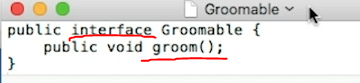
        - So based on above two rules, the following four styles have the same results
        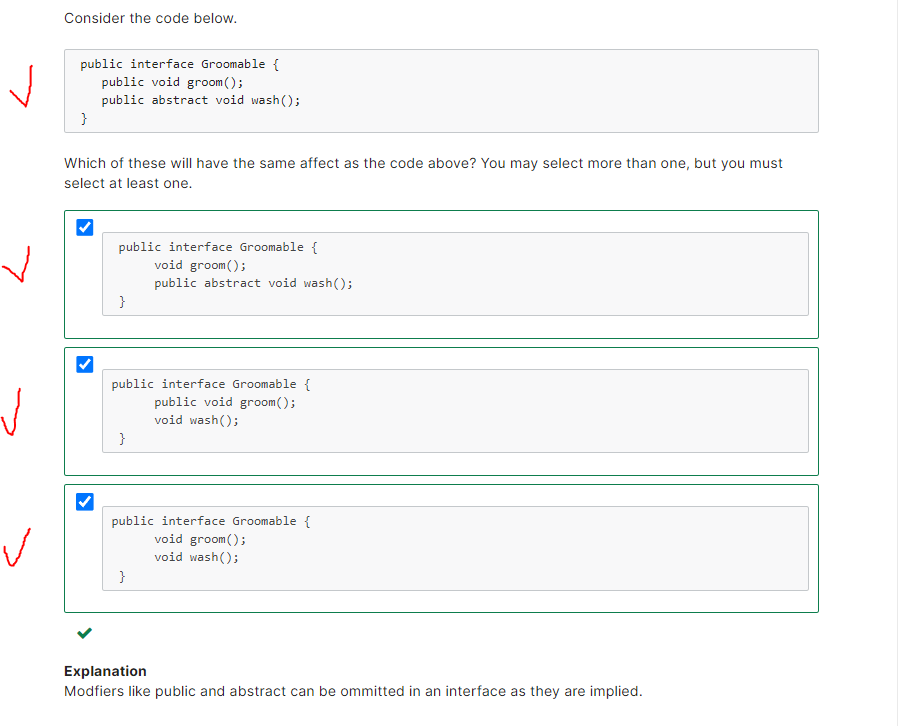
- Other classes that use the interface's methods are called **Implementor** of the interface.
    - To do that, we need to use "implements" clause + class name of interface in the "Implementor" header (screenshot below)
    
- Implementor of the interface can be either abstract class or concrete class
    - Concrete class must complete the methods that referenced from interface method (see example below)
    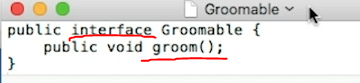
    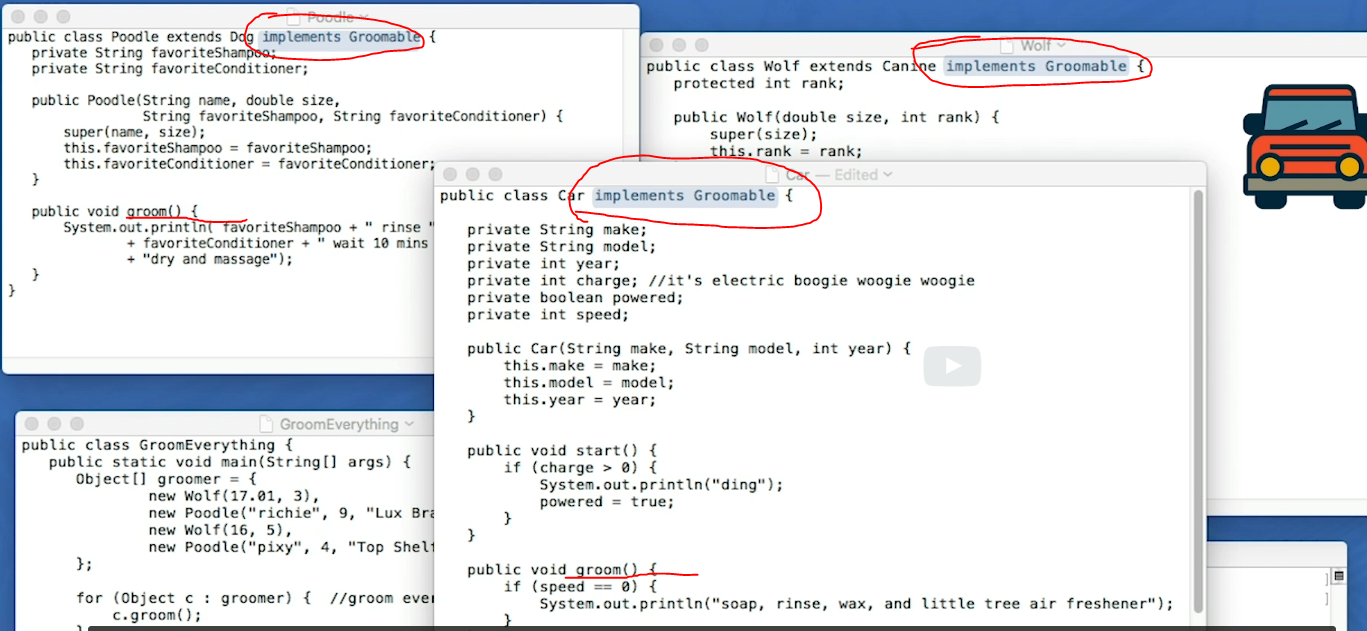
    - Abstract class does not need to define/complete methods from interface, instead, it can delegate to its concrete subclass to complete. (see screenshot below: Canine is superclass and is implementor of interface Groomable, it delicates to its subclass to complete the groom() method)
        - When abstract class is used as Implementor, its subclasses can omit "implements" clause in their class header (see screenshot below: Poodle subclass's class header does not have "implements" clause) 
    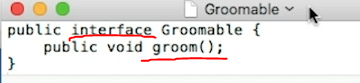
    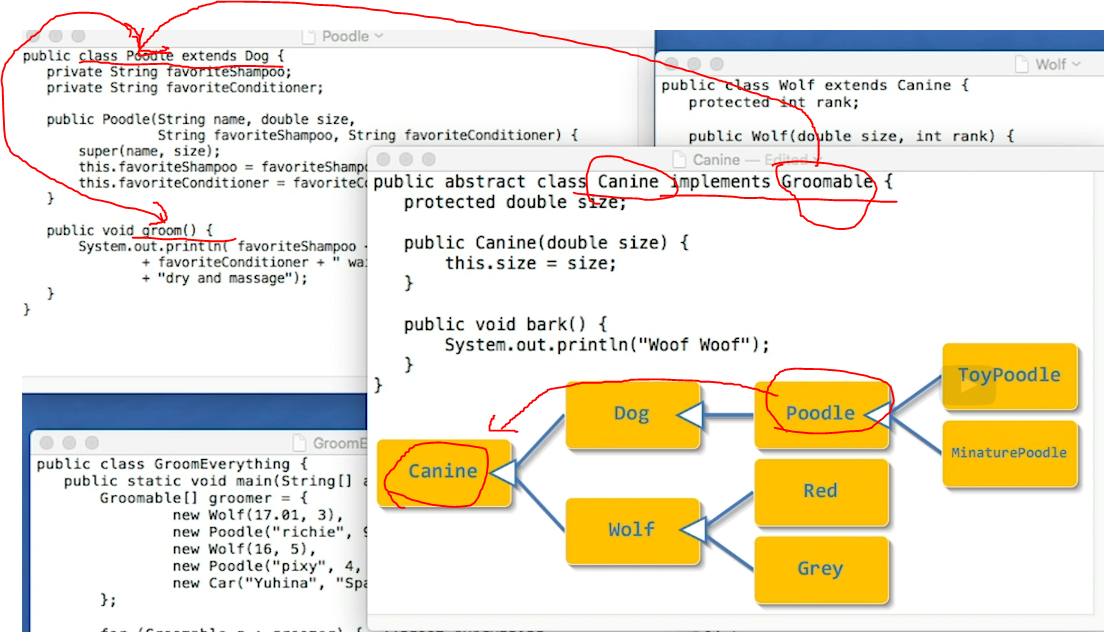
- Object/Instance of the class which is implementor of interface will have multiple types: type of its class (and its superclass) and type of interface ("Interface" is one of the object types in Java)
> An object/instance can technically have multiple types in Java
    - Note: Java also passes its interface type from superclass to all its subclass via interitance tree
    - i.e. if superclass is the implementor of interface, then all of its subclass's instance will have the "interface" type as one of its type.




# 2. Writing a compareTo() method with "Comparable" interface (A real world example of Interface) 

Goal:

a.compareTo(b)
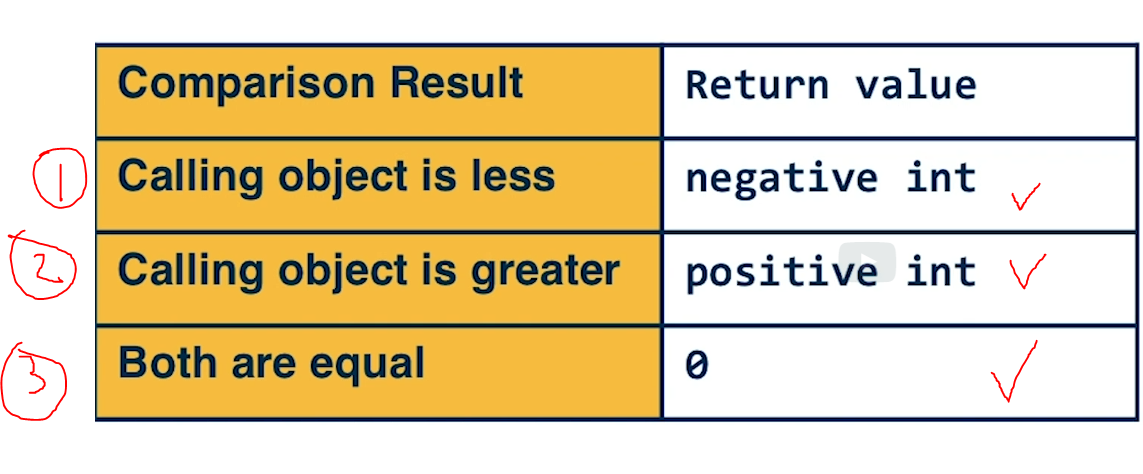

Note: java.lang.Comparable package has already implement this interface above, so we don't need to write the interface.

- The interface class name is called "Comparable" (just like "Groomable" interface that we defined in the last example)
- The abstract method defined under the interface is called "compareTo"
- Source code: https://developer.classpath.org/doc/java/lang/Comparable-source.html
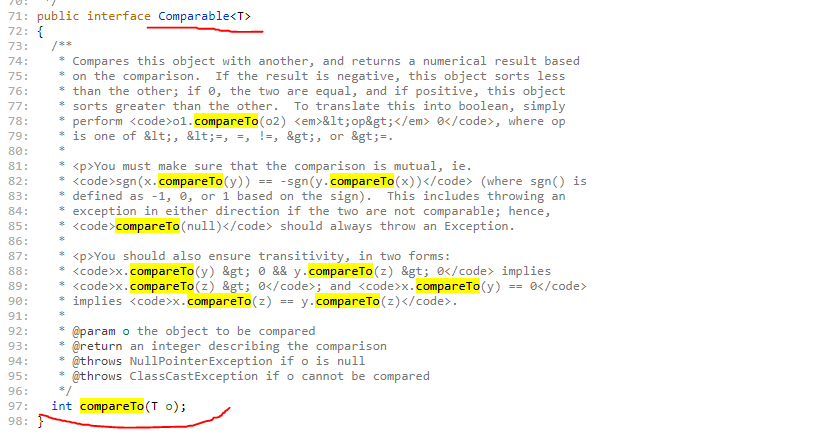


Next step is to "implement" interface in implementor (i.e. Wolf Class here)
- Note1: "implements" clause must come after extends xxx;
- Note2: Since anotherWolf variable is "Object" type, and "Object" type does not have .rank method, so we need to **cast** (downcasting here) it to Wolf object type by using (Wolf)  --> (This is similar to what we did in last Module_5_L12 notes: Section 9. Let's override "Equals" methods in Object Class where we downcast "o" to Dog3 object type)
- Note3: "rank" variable in blue highlights refers to Wolf object instance "alpha"'s rank, because alpha object invokes the method. (This is generally true for all method invoking!!!)

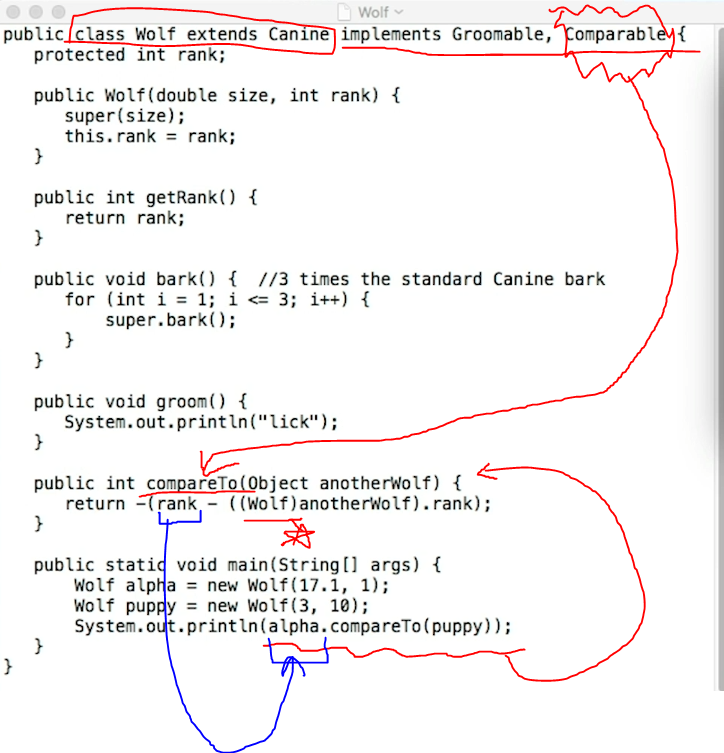

> Why do we need to use Interface Comparable? Can we just self-define a standalone compareTo() method within the class?
> - Reason: Well technically you can. But we prefer to use the interface here because there are so many other classes that might also use the compareTo() method, just in a different form that suits their class needs, we prefer to use interface. More specifically: Recall that an interface provides a way of **enforcing** that a class defines one or more methods. And if not, the class won't compile. One way to think about an interface is that it's like a contract. If the class implements an interface, it's bound to a contract represented by a set of abstract methods.

#### Alternative method: to Bypass the need to "Cast" in step above
- When **using(implements)** Comparable interface in java.lang package, we can have options to specify the object type we would like to pass into the class
    - See source code below, "T" represents the object type, where we can specify, if not specify, the default is Object type.
    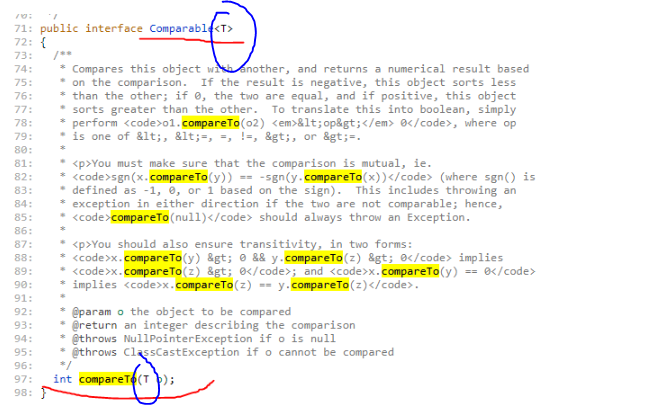

- How to do it?
    - Just specify the type like below in <>, e.g. <Wolf>
    - After that, you will notice that: 1. Object was changed to Wolf in compareTo() parameter; 2. we no longer need to **cast** anotherWolf variable because it is already a Wolf object type.
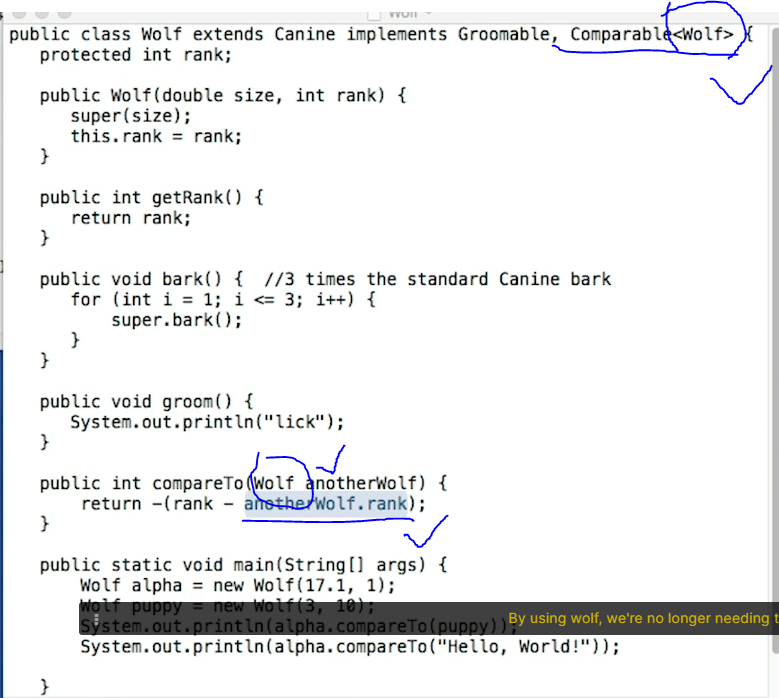

- Definition:
    - Such Interface or Class (e.g. Comparable interface above) that is capable of specifying the formal parameter's type (e.g. "Wolf" type in the example above), is called **"Generic Type"** (This starts from Java Version 5)

> Summary:
> - **Generic Types** can ensure the formal parameter compatibility in the **compile stage**, rather than runtime stage
>    - For example above(i.e.Alternative method), if input to .compareTo() method is not "Wolf" type, it will show compiler error. 
>    - But if we do not use the alternative method above (i.e. use original method to use default "Object" in compareTo() method), then any object type input will pass the compiler stage, and might throw error in runtime stage (i.e. at casting line of code), if the input type is not "Wolf"
> - **Comparable** is just **one of many** generic types in the Java class library. We will explore others in later lessons and even learn how we can write one from scratch.

# 3. Arr.sort() method

In java.util.Arrays class, there is sort() method.

- VIP!!!!!!: **sort()** method needs to invoke **compareTo()** method based on API doc so that's why we customized our compareTo() method above!!!

- To use it, first import the util.Arrays packages (Array class has to be imported), then simply call sort() method.
    - Please note: sort() method will directly modify the input array, i.e. "pack" in this example
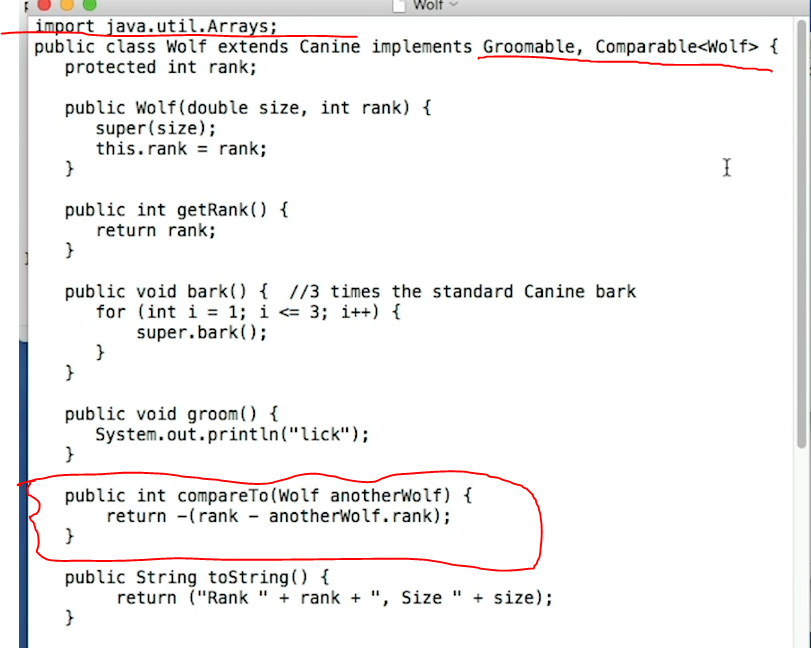

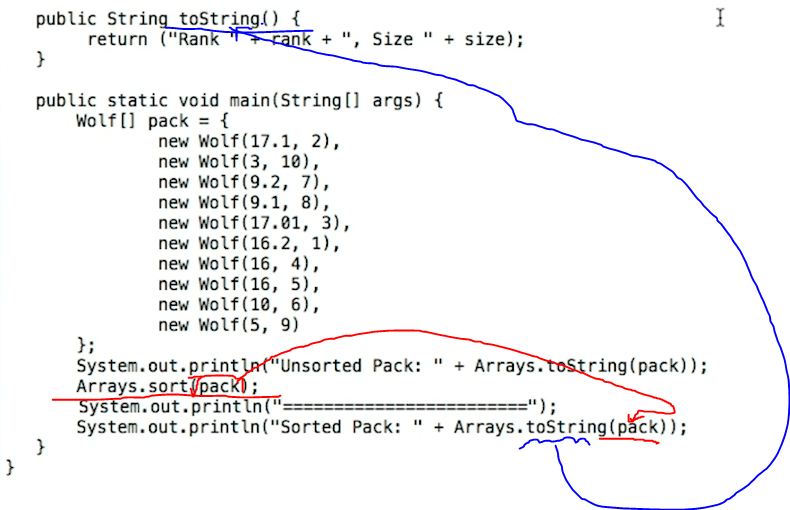


# 4. Deeper look at Sorting Algorithms

**3 types of common sorting algorithms:**
- Selection Sort
- Merge Sort
- Insertion Sort


## 4.1. Selection Sort Algorithm


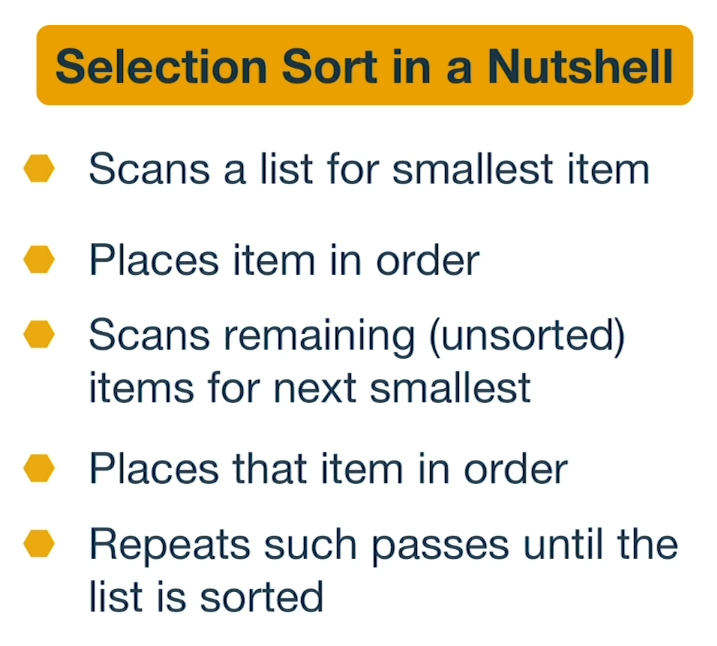

Please note: everytime when finding a smallest item, it will be placed into the corresponding places (index) in the list, and the original item in the list has been swapped position.
- For example, in the first pass, 1 was found to be the smallest, so it was placed to the 1st (index = 0) of the list, then 3 was swapped with 1 in the position of the list. (same for the second pass, third pass, ...) (see below for 1st pass and 2nd pass example)
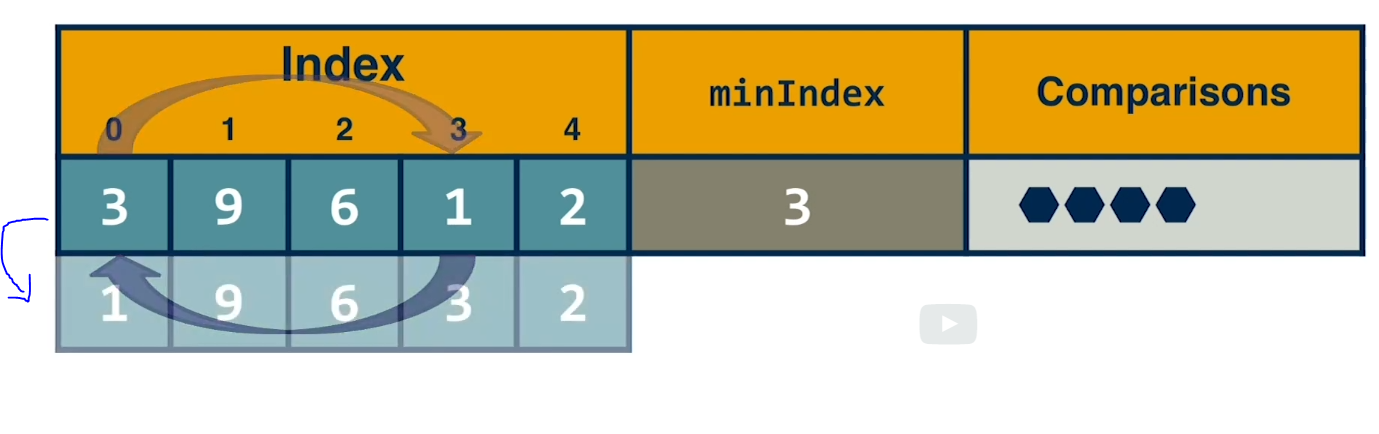
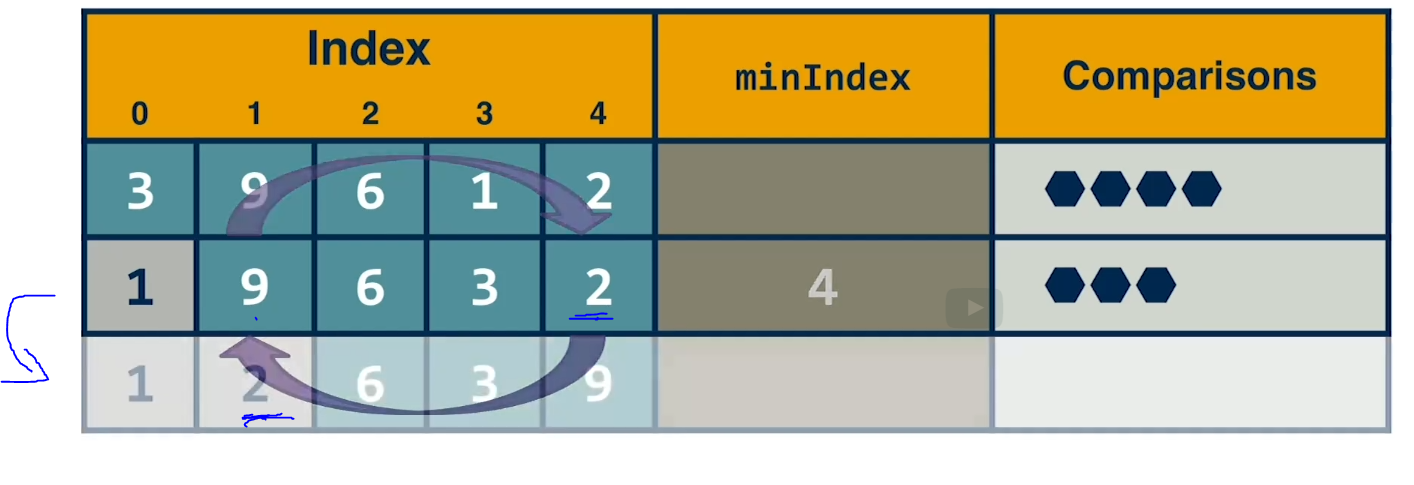

Number of passes and comparision needed:
- the # of **passes**(outer loop): n-1 (where n = length of the list)
    - "-1" because the last pass is not required because at the last pass, there is only 1 remaining element in the list
    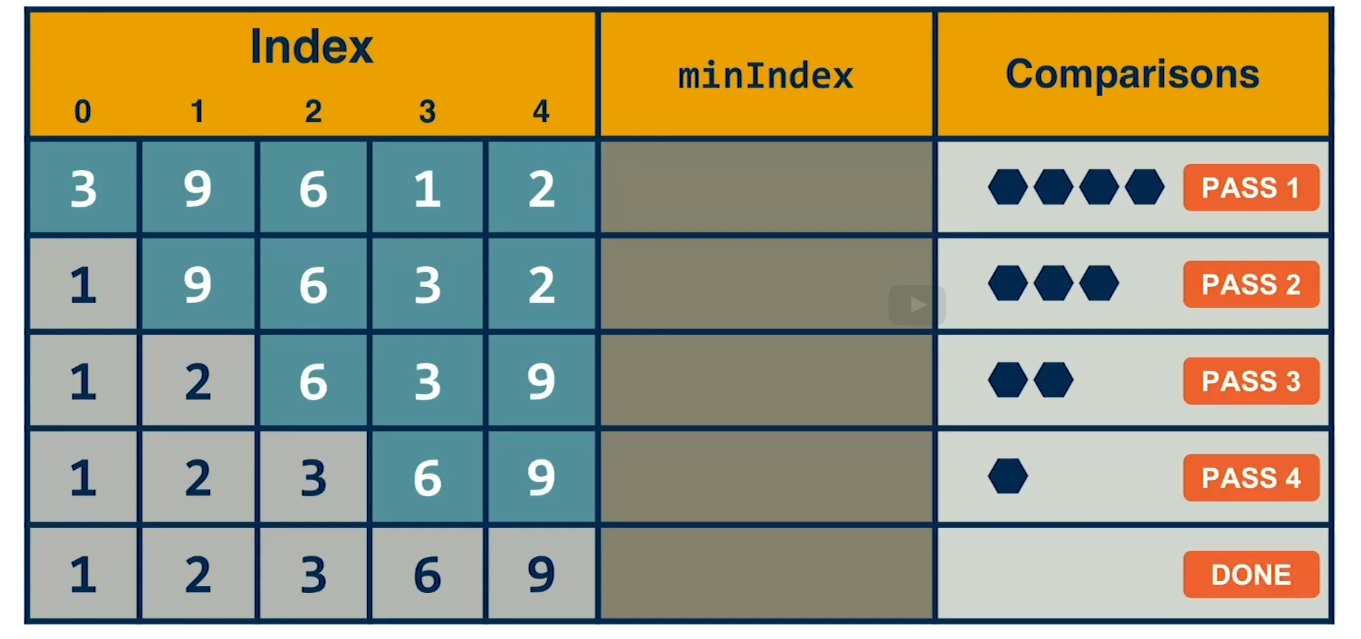

**Alogrithm code:(Assuming all elements in list is Int type)**
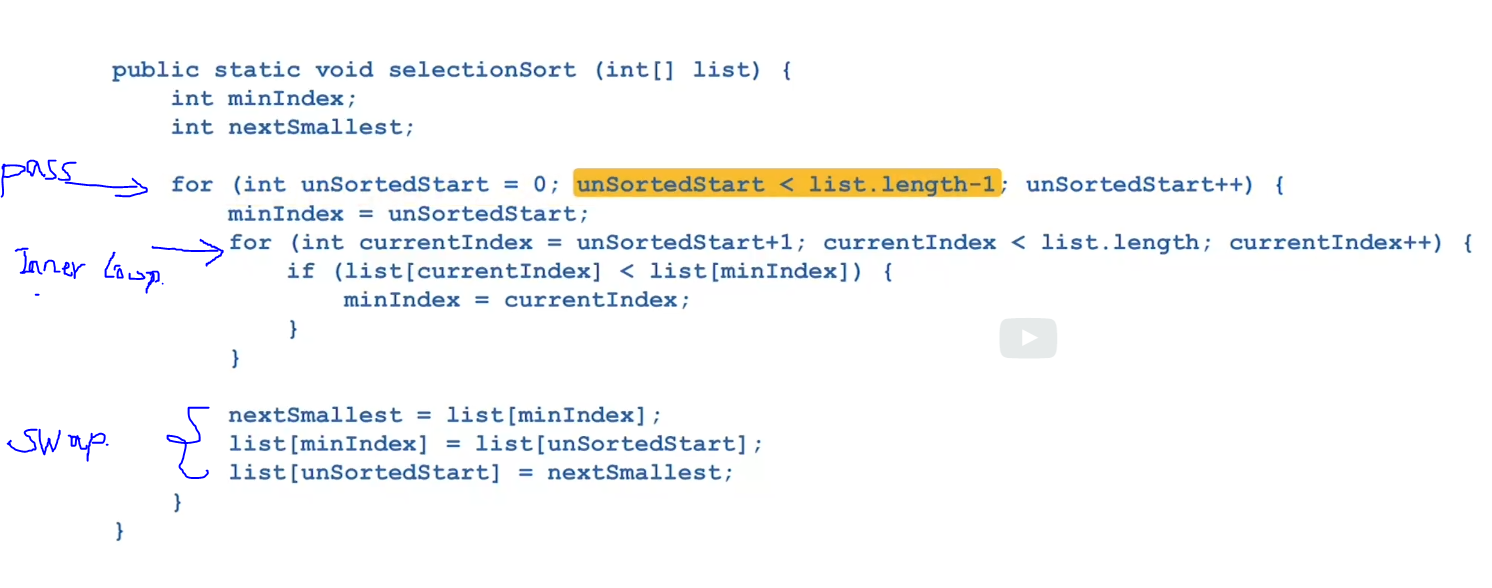

**Algorithm code: (when elements in list is Object Type)**
- Note: in this "object" type sort, we need to use the similar setup as section 3 notes above "3. Arr.sort() method", to use "Comparable" interface, and self-define "compareTo" method beforehand.
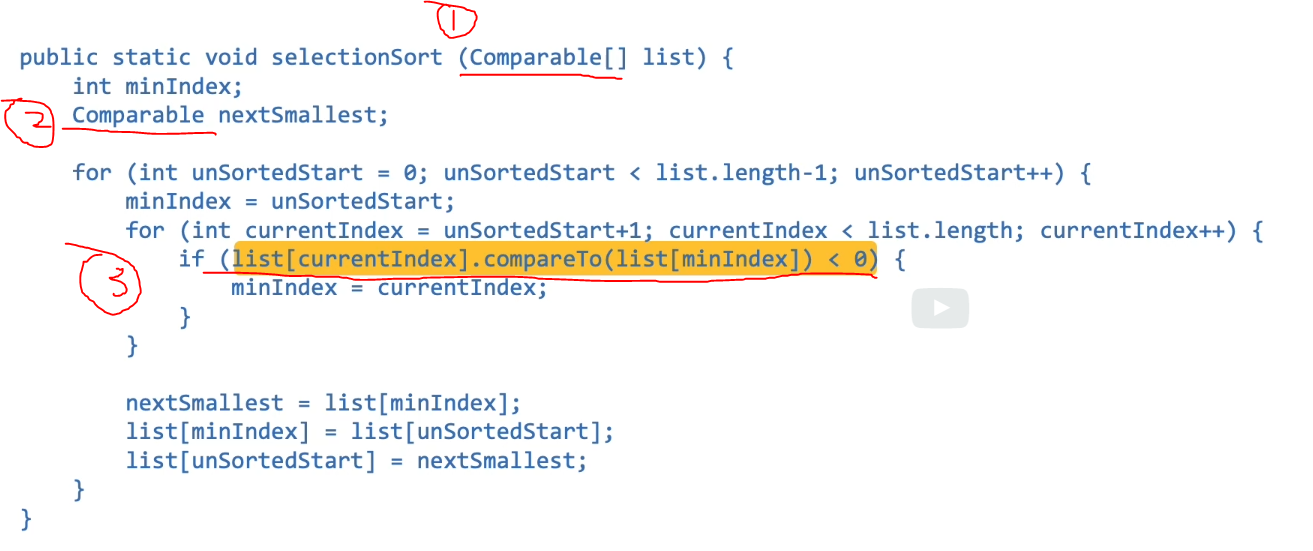

## 4.2. Insertion Sort Algorithm

The outer loop looks the similar as Selection Sort Algorithm above, but the inner loop is different:
- The inner loop only loop until the nextInsert (first element from right side of the list - unsorted list) find its position, i.e. the left side list is already sorted, so it only needs to compare to each element(currentIndex) from one direction, e.g. from right to left, until nextInsert's element is larger or equal to its the element it is comparing to (then nextInsert's element will stop moving to the left).
- In comparison, the selection sort's algorithm's inner loop compares the first element from right side of the list to **each everyone of the element in the left side list**.


This is why the Insertion Sort Algorithm's time complexity is dependent on whether the list is pre-sorted or in reverse order, and how much it is in order before passing to the Insertion Sort method. While Selection Sort Algorithm's time complexity is independent on the list. (see "Algorithm Complexity" section below) 

**Alogrithm code:(Assuming all elements in list is Int type)**
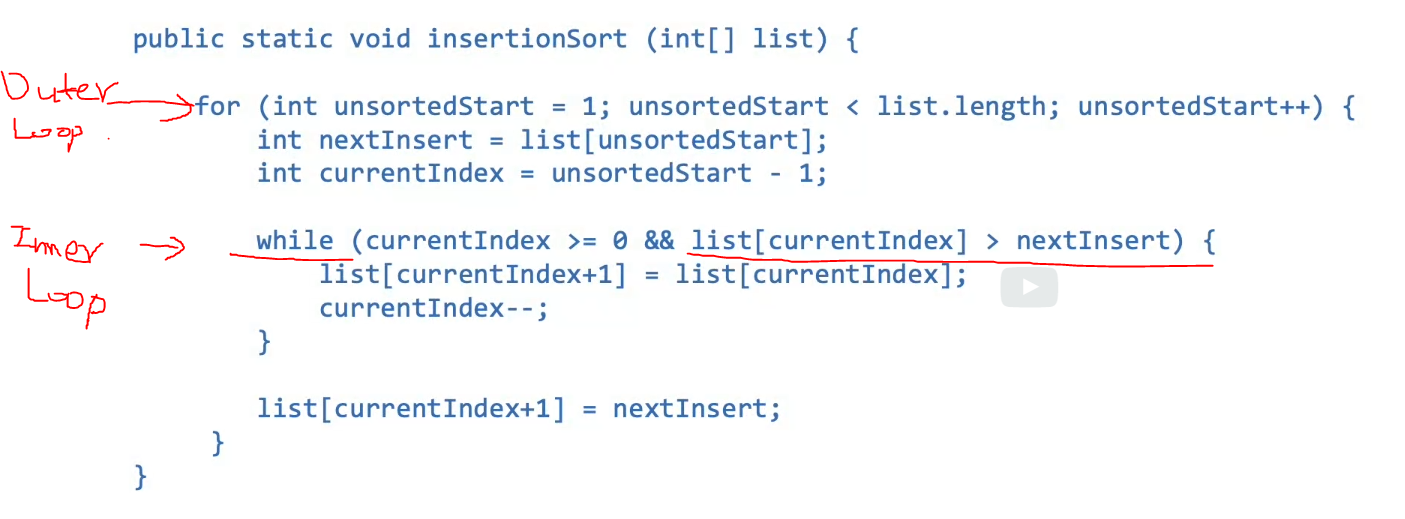
> Note: The code block inside the inner loop essentially does two things: 1. shift the currentIndex element to the right by 1 index. 2. update the pointer to point to currentIndex-1 (left of currentIndex element from left side list that we are comparing to)

**# of comparisons needed if input list is reverse ordered**
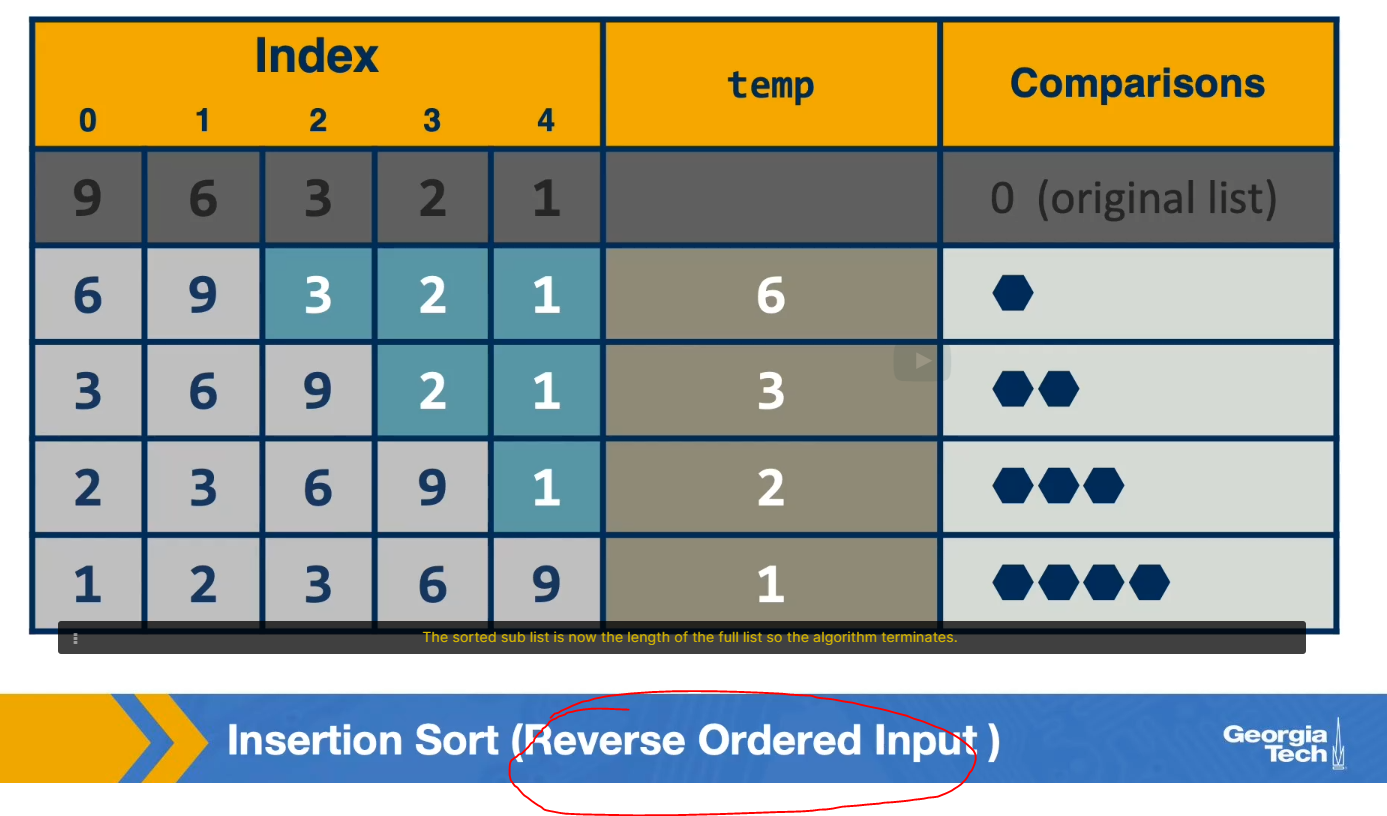

**# of comparisons needed if input list is already sorted (best case scenario)
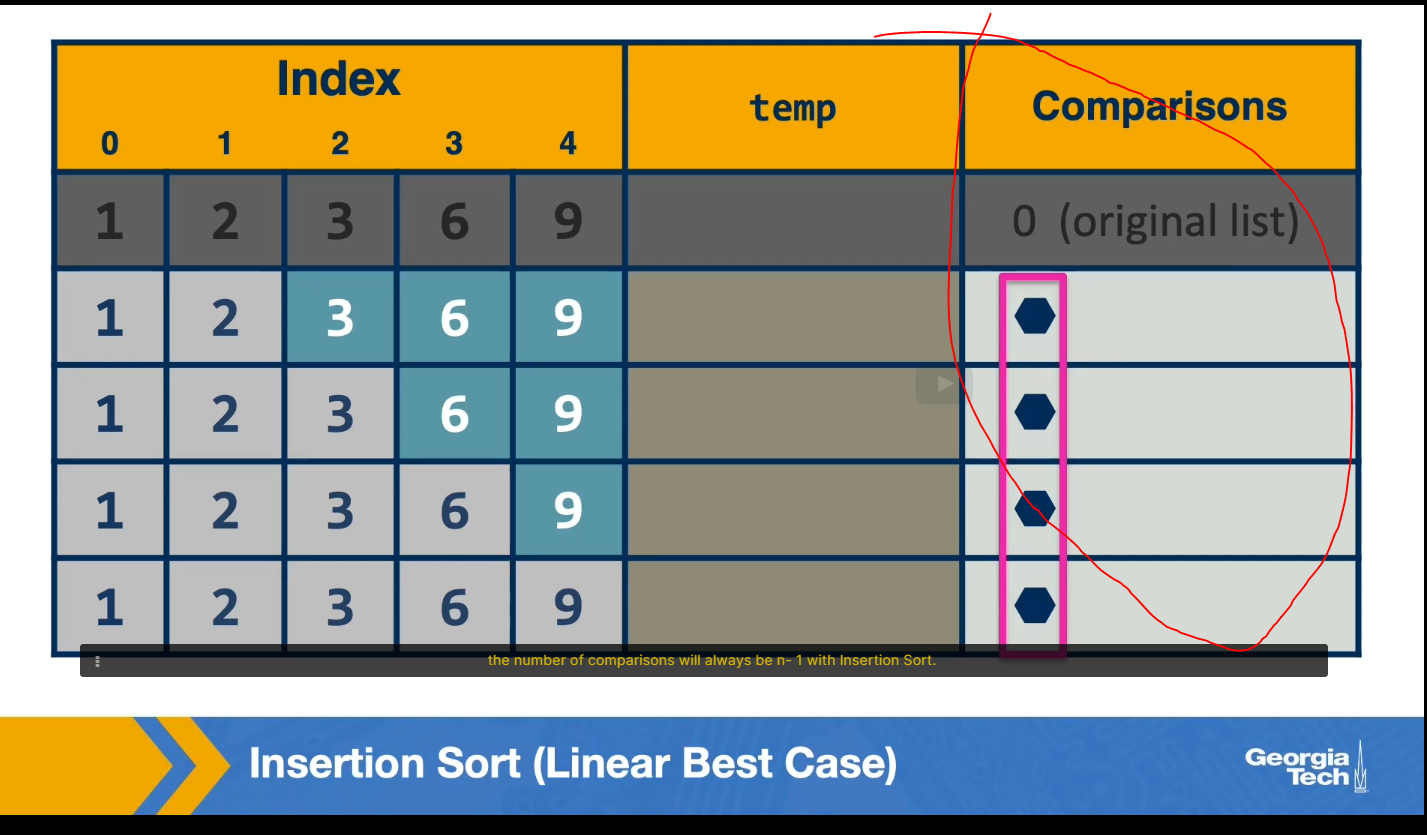

## 4.3. Merge Sort Algorithm

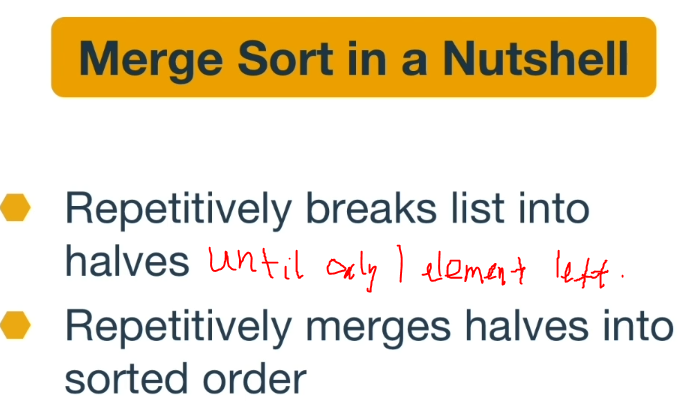

Example:
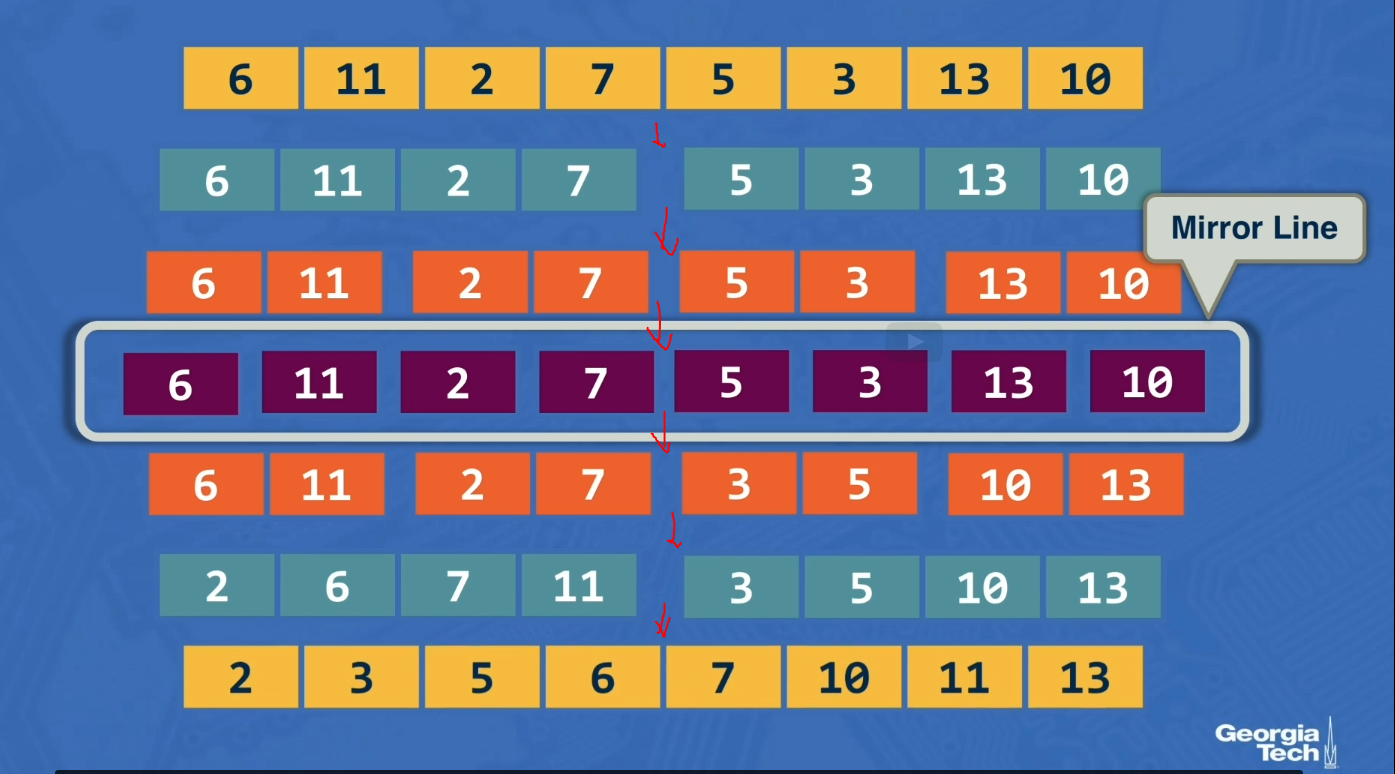

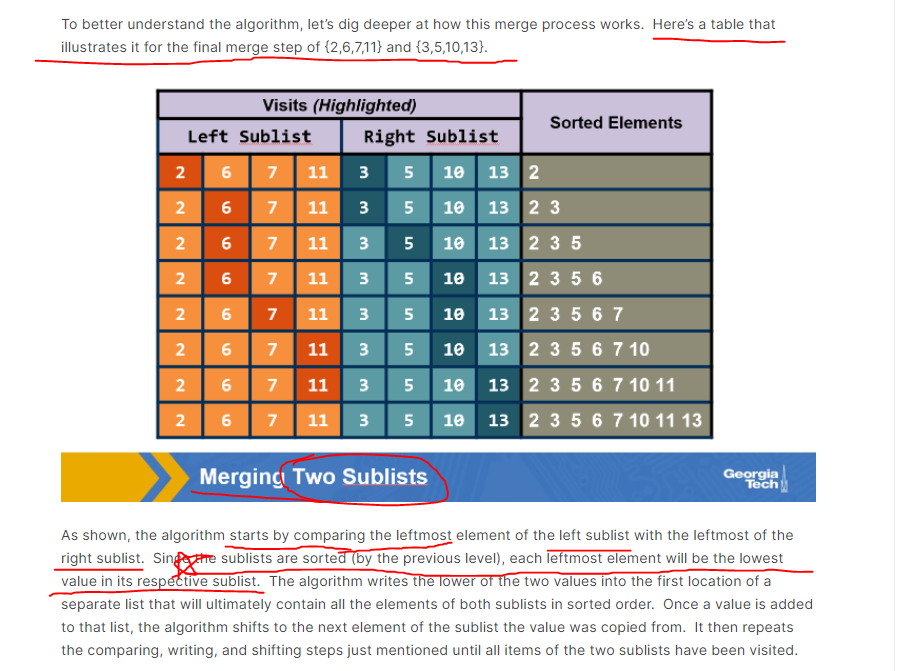

**Alogrithm code:(Assuming all elements in list is Int type)**

In this course, we won’t put much focus on the makeup and tracing of the merge sort code as we did for selection sort.  You will not be asked to code merge sort method on an exam for example. 

The kind of repetition it uses to achieve successive halving and then merging is not conventionally done using the familiar concept of loops.  Instead,  merge sort is an illustration of a more complex language construct for repetition called **recursion**.  Such repetition occurs when a method calls itself, as illustrated in the two highlighted lines in the mergeSort method.  The sound of that probably seems strange and therefore the code may be pretty difficult to follow.  We will discuss recursion in the next course and you may choose to come back here and trace the code with an example. 

***code***:
```js
public static void mergeSort(int[] list, int start, int end) {
    if (start == end) {
        return;
    } else if (start == end-1) {
        if (list[start] <= list[end]) {
            return;
        } else { // swap
            int temp = list[start];
            list[start] = list[end];
            list[end] = temp;
        }
    }
    
    int mid = (end-start)/2;
    mergeSort(list, start, start + mid); //break into half
    mergeSort(list, start + mid + 1, end); //merge
    merge(list, start, start + mid, end); //helper method that merges two sublists
}

private static void merge(int[] list, int leftHalfStart, int rightHalfStart, int end) {
    int leftHalfSize = rightHalfStart - leftHalfStart + 1;
    int rightHalfSize = end - rightHalfStart;

    int[] leftHalf = new int[leftHalfSize];
    int[] rightHalf = new int[rightHalfSize];

    for (int i=0; i<leftHalfSize; ++i)
        leftHalf[i] = list[leftHalfStart + i];
    for (int j=0; j<rightHalfSize; ++j)
        rightHalf[j] = list[rightHalfStart + 1+ j];

    int i = 0;
    int j = 0;

    int k = leftHalfStart;
    while (i < leftHalfSize && j < rightHalfSize) {
        if (leftHalf[i] <= rightHalf[j]) {
            list[k] = leftHalf[i];
            i++;
        } else {
            list[k] = rightHalf[j];
            j++;
        }
        k++;
    }

    while (i < leftHalfSize) {
        list[k] = leftHalf[i];
        i++;
        k++;
    }

    while (j < rightHalfSize) {
        list[k] = rightHalf[j];
        j++;
        k++;
    }
}

```

**Algorithm code: (when elements in list is Object Type)**

The main reason for showing the method here is to again illustrate how only simple edits are needed to convert a method that only sorts one kind  of array type to one that can sort an unbounded set of array types
- The highlighted parts represent the necessary changes.  Just like in the selection sort example, only the array types and comparison operations need to be replaced.

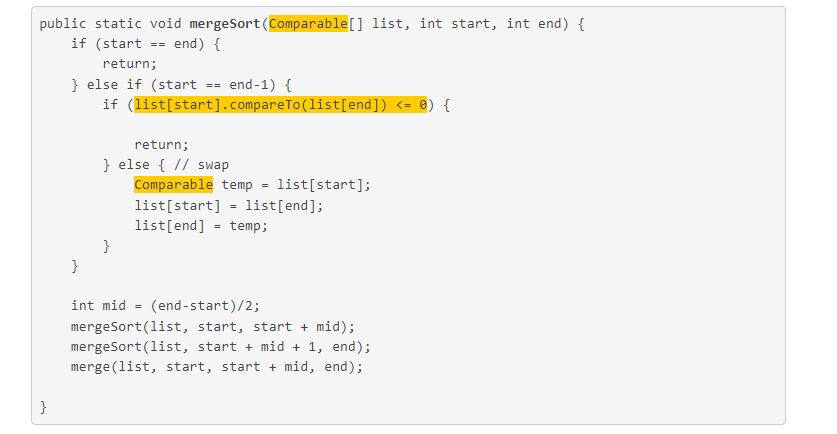
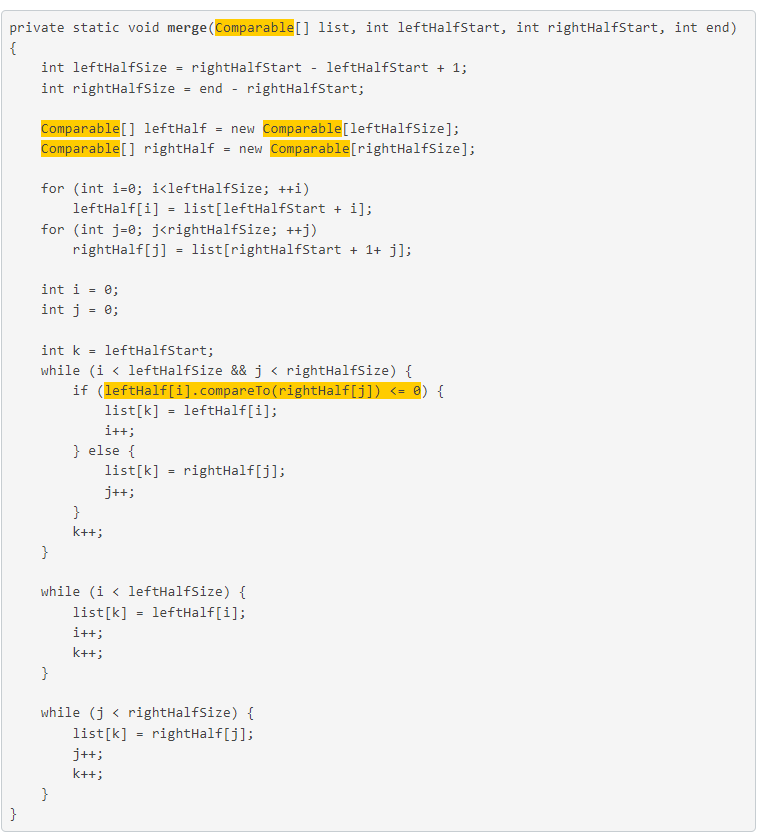

# 5. Algorithm Complexity

For this course, we focus on Time Complexity instead of Space Complexity.
> As famously stated by Georgia Tech's own Professor Merrick Furst: "The biggest difference between time and space is that you can't reuse time."

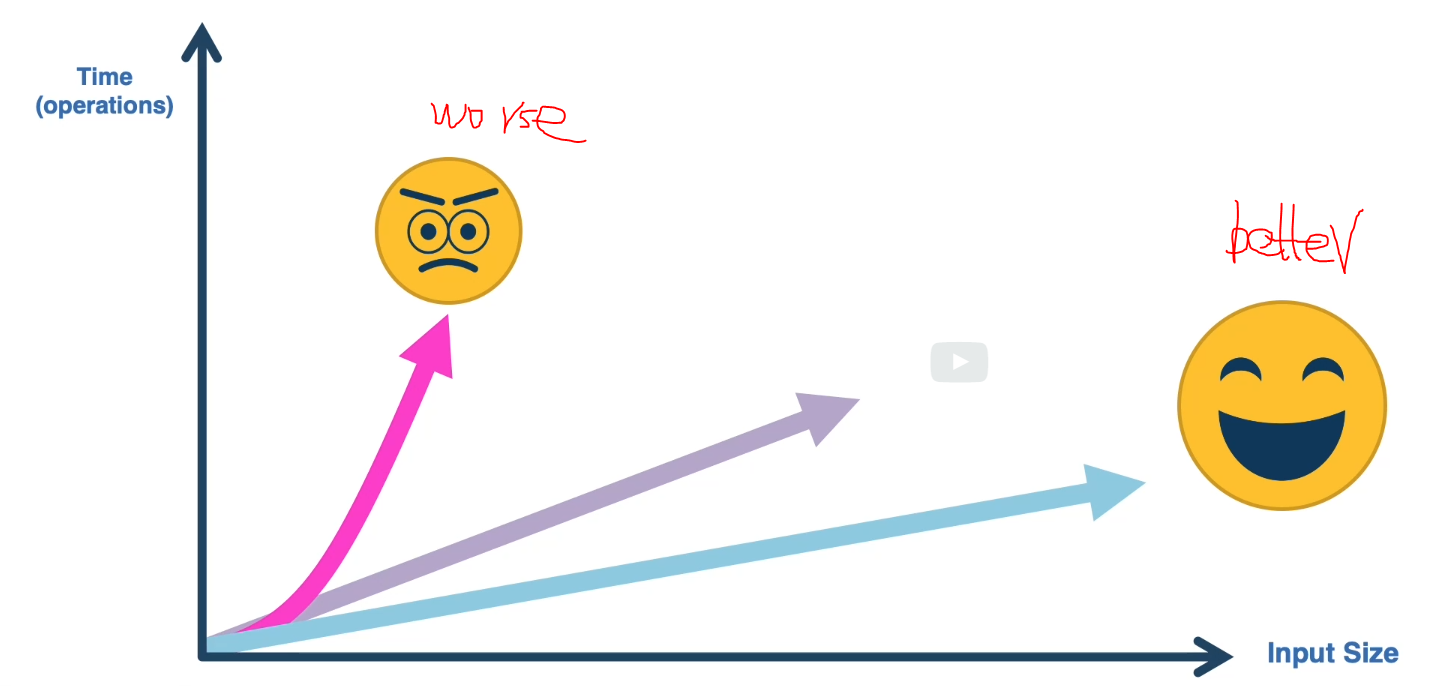

## 5.1. Time Complexity of Selection Sort 

- Regardless of what input array (sorted or not sorted), the # of comparison needs to be done is the same given the input length = n:
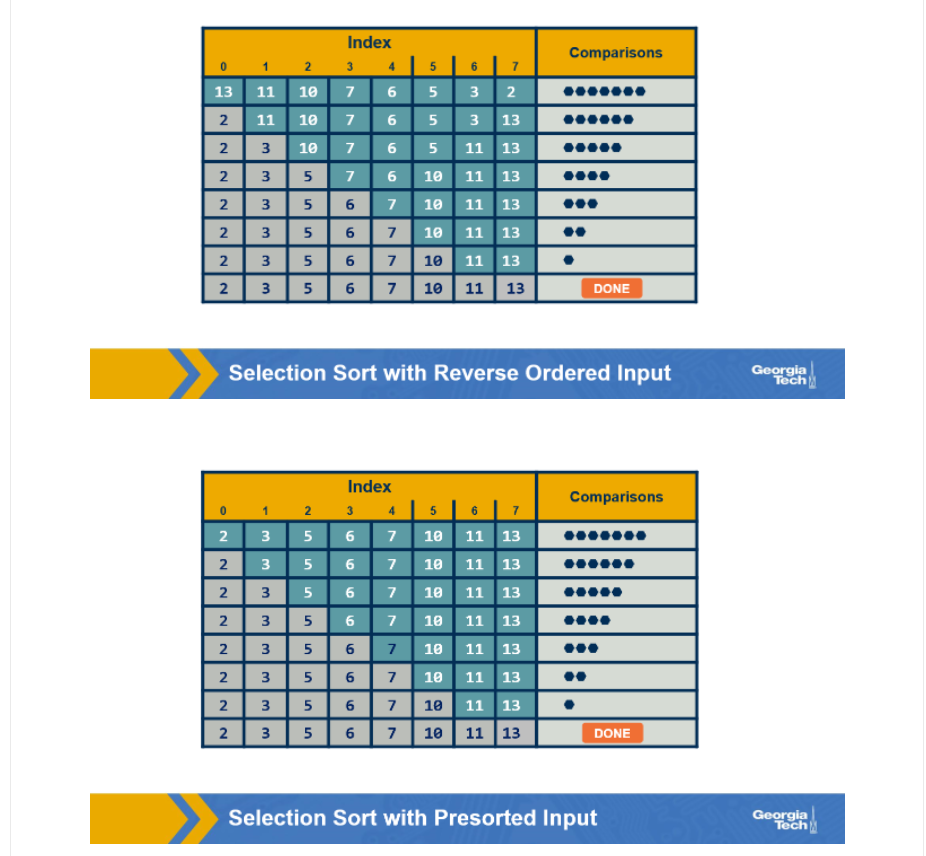

- Formula (number of comparison needed, i.e. time complexity):
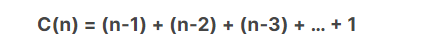
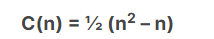
    - We can see the time complexity is n^2, because n^2 term, which is the highest ordered term, dominates the rate of growth.

## 5.2. Time Complexity of Insertion Sort 

- Same as time complexity of Selection Sort because for time complexity, we only consider the worst case scenario (i.e. the input list is in reverse order), and we have proven the worst case scenario, these two algorithm needs same # of comparisons (see previous sections)

- However, if the actual time it takes to finish this Insertion Sort algorithm when it is not worst case scenario will be less than Selection Sort, because Insertion Sort is dependent on how well-sorted the input list is. (as indicated in the previous section)
- The best case scenario (input list is sorted) will take C(n)=n-1 time to finish using Insertion Sort

## 5.3. Time Complexity of Merge Sort

- Merge Sort Time Complexity is regardless of the initial order of its input list.


- Time complexity for Merge Sort Algorithm is **Linearithmic**, which is a combination of linear and logarithmic.
    - Generic form of **Linearithmic**: n*log(n)
    - Specifically for Merge Sort, it is: n*log2(n)
    - Reason: we divide the whole list to half, and then half, ..., so it is log2(n) with base of 2.
        - log2(n) part corresponding to division (halving) operation
        - n part corresponding to merging operation
        
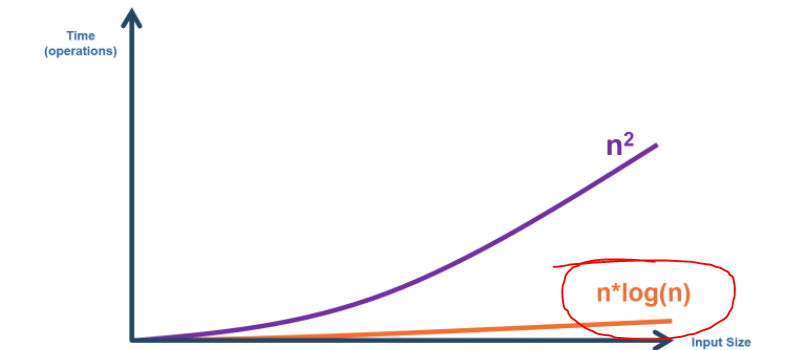
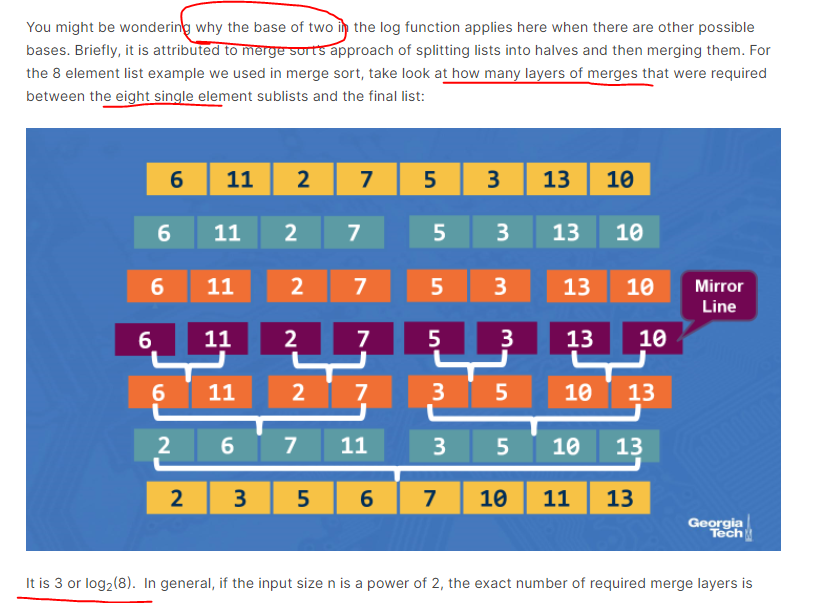

## 5.4. Seven Growth Rate (For Time Complexity Calculation)

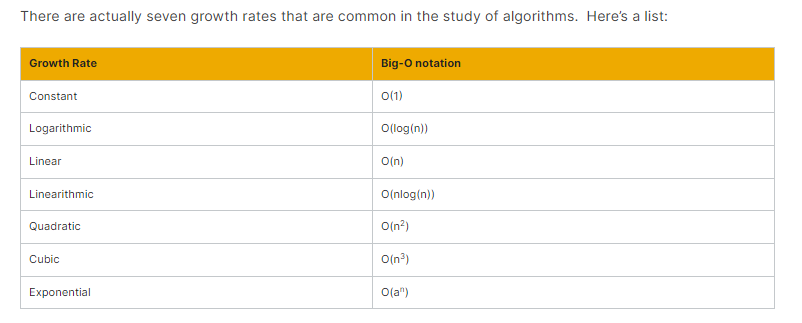

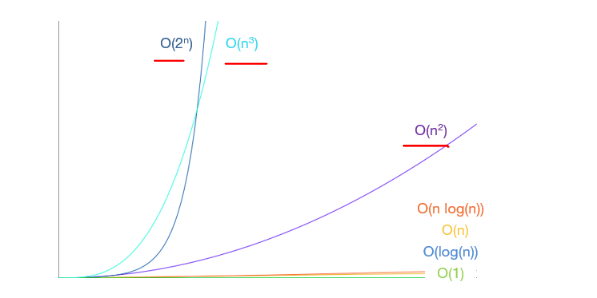

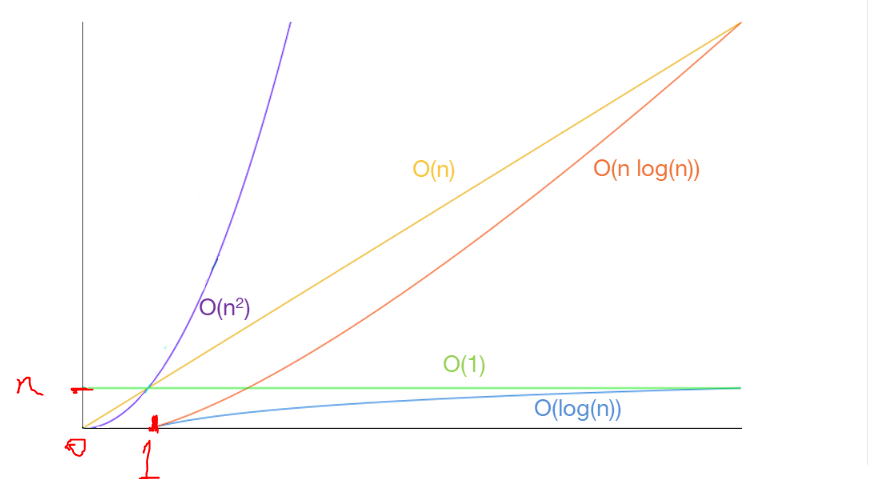

# 6. Binary Search Algorithm

- !!! one important precondition -- the elements of the list to search **must be pre-sorted**.


**Algorithm code: (when elements in sorted list is Object Type)**
- highlight (1) below means: middle value equal to target value to search, then directly return that value
- highlight (2) below means: target value < middle value, then right half of the list is eliminated, pointer of "end" moves to (mid-1)
- highlight (3) below means: target value > middle value, then left half of the list is eliminated, pointer of "start" moves to (mid+1)
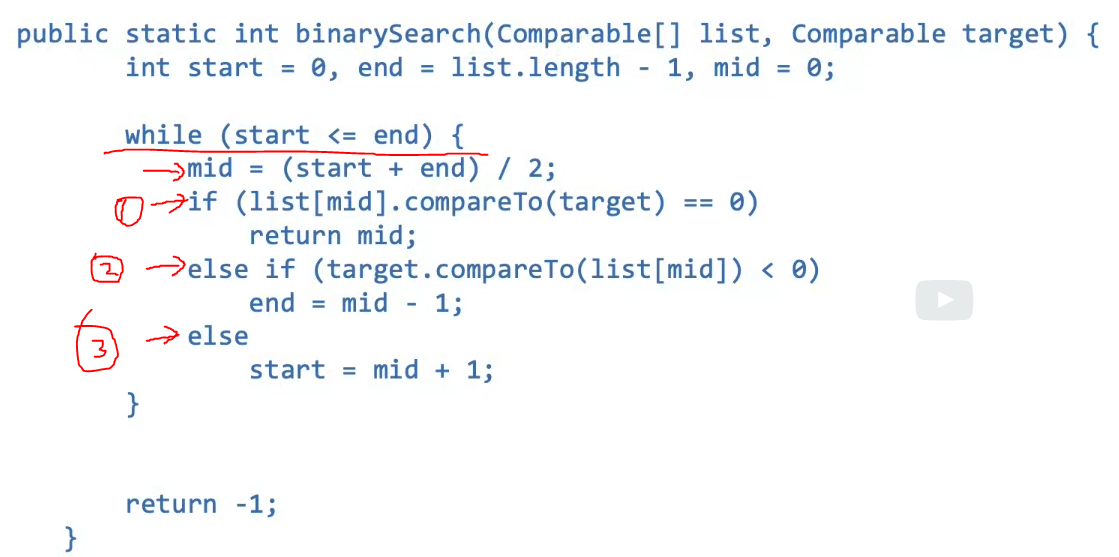


**Time Complexity O(n) for Binary Search Algorithm**

Best Case:
C(n) = O(1), i.e. middle value is the one we are search for.

Worst Case:
C(n) = O(log2(n))

